In [508]:
## importing models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error  ,mean_squared_error 

In [509]:
dd = pd.read_csv(r"D:\2 . Data Science\My Studies\ML\Linear Regression Project\diamonds.csv" , index_col= 0)
dd.head()

## y - price
## x - rest of the cols

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [510]:
# checking for duplictes
dd[dd.duplicated() == True]
dd.duplicated().sum()
dd.drop_duplicates(inplace= True)

In [511]:
# checking for null values
dd.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [512]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [513]:
dd.describe(percentiles=[0.05,0.95]).T

,count,mean,std,min,5%,50%,95%,max
carat,53794.0,0.797780,0.473390,0.2,0.30,0.70,1.70,5.01
depth,53794.0,61.748080,1.429909,43.0,59.30,61.80,63.80,79.00
table,53794.0,57.458109,2.233679,43.0,54.00,57.00,61.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,544.00,2401.00,13100.05,18823.00
x,53794.0,5.731214,1.120695,0.0,4.29,5.70,7.66,10.74
y,53794.0,5.734653,1.141209,0.0,4.30,5.71,7.64,58.90
z,53794.0,3.538714,0.705037,0.0,2.65,3.53,4.73,31.80


			-------- carat ---------


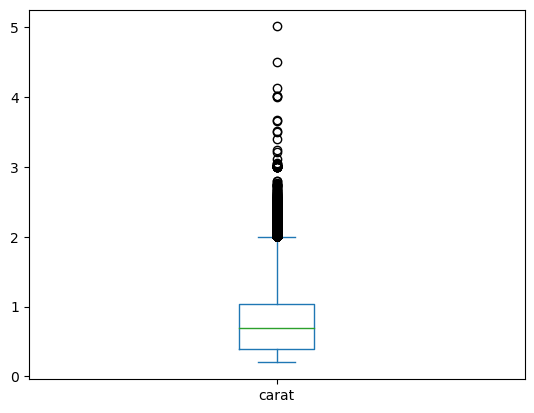

			-------- depth ---------


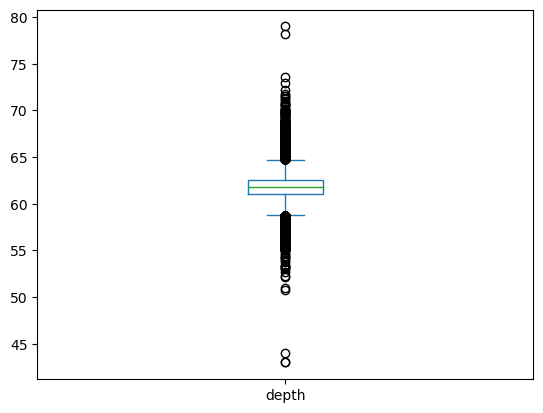

			-------- table ---------


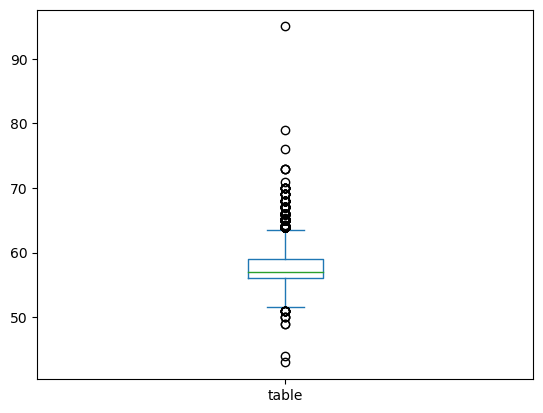

			-------- price ---------


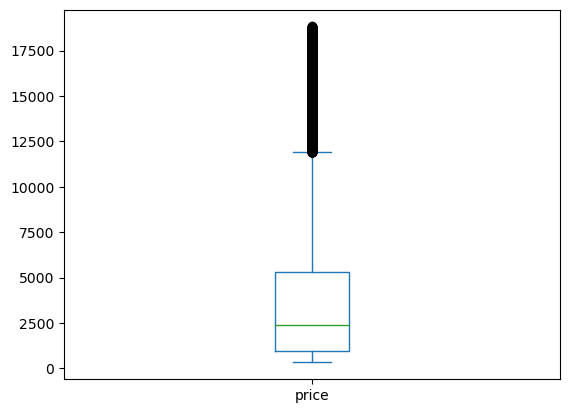

			-------- x ---------


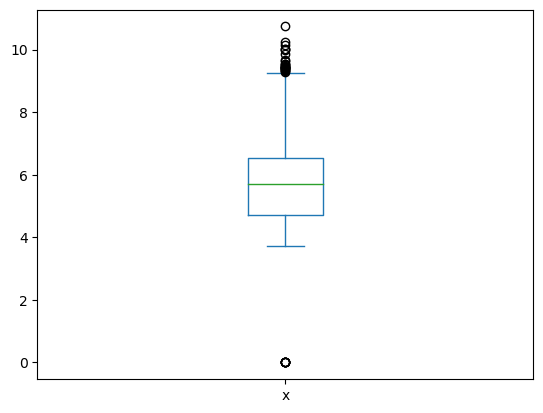

			-------- y ---------


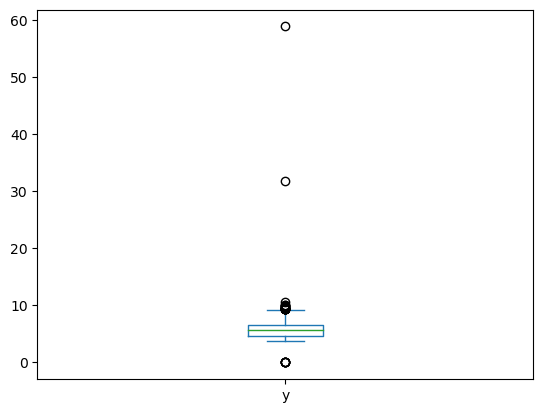

			-------- z ---------


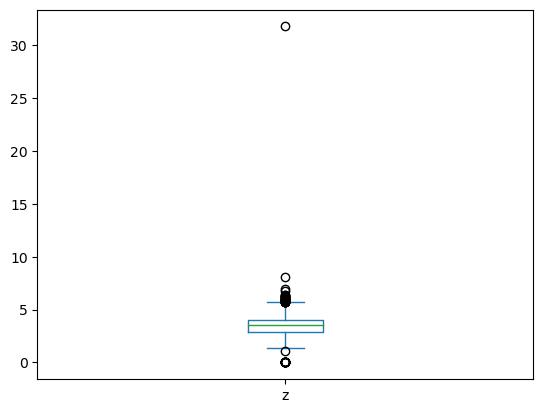

In [514]:
# Outliers

for m in dd.select_dtypes('number').columns:
    print("\t\t\t--------",m,"---------")
    dd[m].plot(kind = 'box')
    plt.show()

In [515]:
# Clipping outliers

for m in dd.select_dtypes('number').columns:
    lower_bound = dd[m].quantile(0.05)
    upper_bound = dd[m].quantile(0.95)
    dd[m] = dd[m].clip(lower=lower_bound, upper = upper_bound)
    

In [516]:
# checking for multicolinearity

<Axes: >

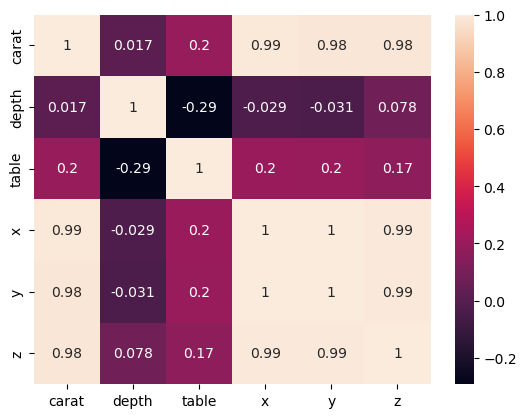

In [517]:
sns.heatmap(dd.select_dtypes('number').drop('price' , axis = 1).corr()  ,annot  =True)

In [518]:
# dd.drop(columns  = ['color', 'clarity'] , inplace= True)

In [519]:
dd = pd.get_dummies(dd  ,drop_first=True )
dd.columns = dd.columns.str.replace(" ", '')

In [520]:
train_df , test_df = train_test_split(dd, test_size= 0.2 ,random_state= 123)

In [521]:
print(train_df.shape)
print(test_df.shape)

(43035, 24)
(10759, 24)


In [522]:
"+".join(dd.columns)

'carat+depth+table+price+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'

In [617]:
formula1  = 'price~carat+depth+x'

model1 = smf.ols(formula1 , train_df)
model1  = model1.fit()
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 1.080e+05
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:22:22   Log-Likelihood:            -3.6726e+05
No. Observations:               43035   AIC:                         7.345e+05
Df Residuals:                   43031   BIC:                         7.346e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.028e+04    383.779     52.831      0.000    1.95e+04     2.1e+04
carat       1.473e+04     86.134    171.035      0.000    1.46e+04    1.49e+04
depth       -195.3517      5.290    -36.925      0.000    -205.721    -184.982
x          -2786.3239     34.572    -80.596      0.000   -2854.085   -2718.563
==============================================================================
Omnibus:                     7540.730   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66125.977
Skew:                           0.592   Prob(JB):                         0.00
Kurtosis:                       8.956   Cond. No.                     4.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [618]:
train_pred = model1.predict()
test_pred = model1.predict(test_df)


In [619]:
print(mean_absolute_percentage_error(train_df.price, train_pred))
print(mean_absolute_percentage_error(test_df.price, test_pred))

0.22887667574474696
0.22563010800555308
